In [252]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [253]:
df = pd.read_csv('tallest_men.csv', sep=';')
df.head()

,Country,Metric,Imperial,Name,Note,Lifespan
0,NaN,NaN,NaN,NaN,NaN,(age at death)
1,United States,272 cm,8 ft 11.1 in,Robert Wadlow,Tallest verified human in recorded history,1918–1940 (22)
2,United States,267 cm,8 ft 9 in,John Rogan,Second-tallest male in recorded history and ta...,1867–1905 (38)
3,United States,264 cm,8 ft 8 in,John F. Carroll,"8 ft 0 in (244 cm) standing height, 8 ft 8 in ...",1932–1969 (37)
4,United States,262 cm,8 ft 7 in,Willie Camper,Billed at 8 ft 7 in (262 cm).[12],1924–1943 (18)


In [254]:
#We have NaN values in the dataset. Let's remove them.
df.dropna(inplace=True)
df.head()

,Country,Metric,Imperial,Name,Note,Lifespan
1,United States,272 cm,8 ft 11.1 in,Robert Wadlow,Tallest verified human in recorded history,1918–1940 (22)
2,United States,267 cm,8 ft 9 in,John Rogan,Second-tallest male in recorded history and ta...,1867–1905 (38)
3,United States,264 cm,8 ft 8 in,John F. Carroll,"8 ft 0 in (244 cm) standing height, 8 ft 8 in ...",1932–1969 (37)
4,United States,262 cm,8 ft 7 in,Willie Camper,Billed at 8 ft 7 in (262 cm).[12],1924–1943 (18)
5,Austria,258 cm,8 ft 5.6 in,Franz Winkelmeier,Tallest human in European history. Measured of...,1860–1887 (27)


In Lifespan column, there are mostly two types of entries. 

The first type is for deceased individuals (e.g., 1918–1940 (22)), and the second type is for still living individuals (e.g., born 1997). 

However, when I try to visualize the data with Matplotlib, I notice that there are a few irregular entries aside from these two types. We need to manually correct these irregular entries first.

In [255]:
#First irregular entries:
df.loc[134]

Country                                    Ethiopia
Metric                                       225 cm
Imperial                                7 ft 4.6 in
Name                                 Nagawoo Jimaan
Note           Tallest living man in Ethiopia.[130]
Lifespan    born 1997/98 (aged 24 as of March 2022)
Name: 134, dtype: object

In [256]:
#he is still living. So, we have to replace 1997/98 with born 1997
df['Lifespan'] = df['Lifespan'].str.replace("born 1997/98 (aged 24 as of March 2022)", 'born 1997')
df.loc[df['Lifespan'].str.contains('born 1997')]

,Country,Metric,Imperial,Name,Note,Lifespan
65,United States,235 cm,7 ft 8.5 in,Broc Brown,"In 2015, he was the tallest teenager in the Un...",born 1997
134,Ethiopia,225 cm,7 ft 4.6 in,Nagawoo Jimaan,Tallest living man in Ethiopia.[130],born 1997


In [257]:
#Second irregular entries:
df.loc[10]

Country                                          Roman Empire
Metric                                              255.66 cm
Imperial                                         8 ft 4.65 in
Name                                          Maximinus Thrax
Note        Emperor of Rome, among the first people known ...
Lifespan                                 173–238 (aged 64–65)
Name: 10, dtype: object

In [258]:
#show starting with (aged in lifespan
df.loc[df['Lifespan'].str.contains('aged')]

,Country,Metric,Imperial,Name,Note,Lifespan
10,Roman Empire,255.66 cm,8 ft 4.65 in,Maximinus Thrax,"Emperor of Rome, among the first people known ...",173–238 (aged 64–65)


In [259]:
#He is not living anymore. So, we have to replace 173–238 (aged 64–65) with 173–238 (65)
df['Lifespan'] = df['Lifespan'].str.replace("173–238 (aged 64–65)", '173–238 (65)')
df.loc[10]

Country                                          Roman Empire
Metric                                              255.66 cm
Imperial                                         8 ft 4.65 in
Name                                          Maximinus Thrax
Note        Emperor of Rome, among the first people known ...
Lifespan                                         173–238 (65)
Name: 10, dtype: object

In [260]:
#Third irregular entries:
df.loc[93]

Country                                                 India
Metric                                                 231 cm
Imperial                                            7 ft 7 in
Name                                           Jitendra Singh
Note        Claimed of being 8 feet 2 inches (249 cm), but...
Lifespan                                   1971–2015 (44)[97]
Name: 93, dtype: object

In [261]:
#he is not living anymore. So, we have to replace 1971–2015 (44)[97] with  1971–2015 (44)
df['Lifespan'] = df['Lifespan'].str.replace("1971–2015 (44)[97]", '1971–2015 (44)')
df.loc[93]

Country                                                 India
Metric                                                 231 cm
Imperial                                            7 ft 7 in
Name                                           Jitendra Singh
Note        Claimed of being 8 feet 2 inches (249 cm), but...
Lifespan                                       1971–2015 (44)
Name: 93, dtype: object

In [262]:
#Fourth irregular entries:
df.loc[39]

Country                                              Mongolia
Metric                                                 240 cm
Imperial                                         7 ft 10.5 in
Name                                             Öndör Gongor
Note        Very tall man in early-20th-century Mongolia. ...
Lifespan                                    1880/85 – 1925/30
Name: 39, dtype: object

In [263]:
#he is not living anymore. So we have to replace 1880/85 – 1925/30 with 1880–1925 (45)
df['Lifespan'] = df['Lifespan'].str.replace("1880/85 – 1925/30", '1880–1925 (45)')

Now in Lifespan column, we only have two types of data entries. From Lifespan column, we can determine birth year, death year, and age of the person. 

Storing these three pieces of information in three different columns can help us with better interpretation.

There will be three columns derived from the Lifespan:

Birth: Represents year person was born.

Death: Indicates whether the person is death.

IsDeath: 1 = Death, 0 = Living

Age: Represents person's age. If the person is deceased, it's calculated by subtracting birth year from the death year. If the person is alive, it's calculated by subtracting birth year from the current year, which is stored in variable current_year, and I'm using this year, 2024 for this.

In [264]:
#We need to use a loop to separate entries for living and deceased individuals.

#initialize
df['Birth'] = None 
df['Death'] = None
df['Age'] = None
current_year = 2024


for i, row in df.iterrows(): #iterate over rows

    lifespan = row['Lifespan'] #get lifespan

    if 'born' in lifespan: #if born in lifespan, it means he is still living
        parts = lifespan.split(' ')
        birth_year = int(parts[1])
        df.at[i, 'Birth'] = birth_year
        df.at[i, 'Age'] = current_year - birth_year
        df.at[i, 'Death'] = 0

    else: #if not, he is not living anymore
        parts = lifespan.split(' ')
        if len(parts) >= 2:
            age = parts[1].replace('(', '').replace(')', '')
            df.at[i, 'Age'] = age
            parts = re.findall(r'\d+', lifespan)
            if len(parts) >= 2:
                birth_year = int(parts[0])
                death_year = int(parts[1])
                df.at[i, 'Birth'] = birth_year
                df.at[i, 'Death'] = death_year
                df.at[i, 'Age'] = death_year - birth_year

#if death year is 0, it means he is still living
if df['Death'].dtype == 'O':
    df['Death'] = df['Death'].replace(0, "Living")

#IsDeath column determines if the person is living or not
df['IsDeath'] = df['Death'].apply(lambda x: 1 if x != 'Living' else 0)

In [265]:
df.sample(n = 15, random_state = 37)

,Country,Metric,Imperial,Name,Note,Lifespan,Birth,Death,Age,IsDeath
4,United States,262 cm,8 ft 7 in,Willie Camper,Billed at 8 ft 7 in (262 cm).[12],1924–1943 (18),1924,1943,19,1
104,United States,229 cm,7 ft 6 in,Jack Earle,Jacob Rheuben Ehrlich. American silent film ac...,1906–1952 (46),1906,1952,46,1
33,Spain,242 cm,7 ft 11.3 in,Miguel Joaquín Eleicegui [es],Tallest man recorded in Spain. The 2017 Basque...,1818–1861 (43),1818,1861,43,1
99,Montenegro,230 cm,7 ft 6.55 in,Slavko Vraneš,Tallest Montenegrin basketball player in the n...,born 1983,1983,Living,41,0
68,India,234 cm,7 ft 8 in,Polipaka Gattaiah,Former tallest Indian.[71],1975–2015 (40),1975,2015,40,1
83,Somaliland,232 cm,7 ft 7.4 in,Hussain Bisad,"Somaliland, considered to be one of the talles...",born 1975,1975,Living,49,0
154,Nepal,221 cm,7 ft 3 in,Rajan Adhikari,Tallest Man From Nepal. Often Mistaken For Ind...,born 1978,1978,Living,46,0
85,United Kingdom,231.8 cm,7 ft 7.26 in,Paul Sturgess,Tied for the tallest player to play college ba...,born 1987,1987,Living,37,0
7,Thailand,257 cm,8 ft 5.2 in,Pornchai Saosri,Claimed to be 8 ft 10 in (269 cm).[16],1989–2015 (26),1989,2015,26,1
24,China,244 cm,8 ft 0 in,Zhan Shichai,Was not measured by Guinness World Record.[33],1841-1847 – 5 November 1893,1841,1847,6,1


In [266]:
#metric must be numeric
df['Metric'] = df['Metric'].str.replace('cm', '').astype(float)

In [267]:
df.sample(n = 10, random_state = 61)

,Country,Metric,Imperial,Name,Note,Lifespan,Birth,Death,Age,IsDeath
100,Vietnam,229.0,7 ft 6.25 in,Trần Thành Phố,Was the tallest man in Vietnam when he died in...,1947–2010 (63),1947,2010,63,1
70,Armenia,234.0,7 ft 8 in,Arshavir Grigoryan,Tallest man in Armenia.[73],born 1990,1990,Living,34,0
24,China,244.0,8 ft 0 in,Zhan Shichai,Was not measured by Guinness World Record.[33],1841-1847 – 5 November 1893,1841,1847,6,1
131,Norway,226.0,7 ft 5 in,Henrik Brustad [no],Was known as worlds largest and strongest man ...,1844–1899 (54),1844,1899,55,1
160,Lithuania,221.0,7 ft 3 in,Arvydas Sabonis,"Former player in the NBA, he played for the Po...",born 1964,1964,Living,60,0
30,China,242.0,7 ft 11.3 in,Zhang Juncai,Tallest living Chinese person.,born 1964,1964,Living,60,0
105,United States,229.0,7 ft 6 in,Ralph Madsen,Billed as 7 ft 6 in (229 cm).[106],1897–1948 (51),1897,1948,51,1
60,United Kingdom,235.0,7 ft 8.5 in,Ted Evans,Height Disputed. Claimed 9 ft 3.5 in (283 cm) ...,1924–1958 (34),1924,1958,34,1
97,Italy,230.0,7 ft 6.55 in,Samuel Deguara,Tallest man in Italy and Malta.[100],born 1991,1991,Living,33,0
63,United States,235.0,7 ft 8.5 in,Igor Vovkovinskiy,Previously the tallest person living in the Un...,1982–2021 (38),1982,2021,39,1


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163 entries, 1 to 168
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   163 non-null    object 
 1   Metric    163 non-null    float64
 2   Imperial  163 non-null    object 
 3   Name      163 non-null    object 
 4   Note      163 non-null    object 
 5   Lifespan  163 non-null    object 
 6   Birth     159 non-null    object 
 7   Death     159 non-null    object 
 8   Age       160 non-null    object 
 9   IsDeath   163 non-null    int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 18.1+ KB


After preprocessing, we have a few missing data that we need to clean up and convert into appropriate datatypes.

In [269]:
df.dropna(inplace=True)
df['Age'] = df['Age'].astype(int)
df['Birth'] = df['Birth'].astype(int)
df.sample(n = 10, random_state = 61)

,Country,Metric,Imperial,Name,Note,Lifespan,Birth,Death,Age,IsDeath
106,United States,229.0,7 ft 6 in,Mills Darden,Known for his extreme weight and height. Weigh...,1799–1857 (57),1799,1857,58,1
155,United States,221.0,7 ft 3 in,Jim Tarver,Billed at 8 ft 4 in (2.54 m). Experts suggest ...,1885–1958 (72),1885,1958,73,1
156,Philippines,221.0,7 ft 3 in,Kai Sotto,Currently plays for the Orlando Magic in 2023 ...,born 2002,2002,Living,22,0
114,Senegal,229.0,7 ft 6 in,Tacko Fall,Currently the tallest player in the NBA G Leag...,born 1995,1995,Living,29,0
129,United States,226.0,7 ft 5 in,Jamarion Sharp,Tallest college basketball player from 2021 to...,born 2001,2001,Living,23,0
142,Slovakia,224.0,7 ft 4 in,Michael Fusek,Slovak professional basketball player.,born 1995,1995,Living,29,0
134,Ethiopia,225.0,7 ft 4.6 in,Nagawoo Jimaan,Tallest living man in Ethiopia.[130],born 1997,1997,Living,27,0
47,United Kingdom,236.0,7 ft 9 in[53],Angus MacAskill,"Tallest ""true"" giant (not due to a pathologica...",1825–1863 (38),1825,1863,38,1
79,Spain,233.0,7 ft 7.7 in,Jaime Clemente Izquierdo,Spain's tallest man in his lifetime.[84],1961–2005 (44),1961,2005,44,1
74,Austria,234.0,7 ft 8 in,Adam Rainer,Only person known to have been both a dwarf an...,1899–1950 (51),1899,1950,51,1


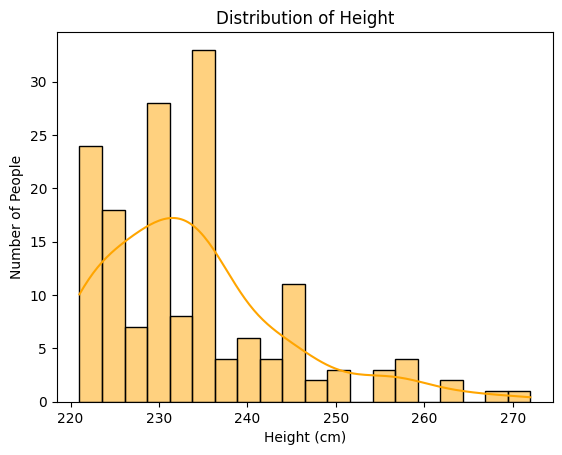

In [270]:
#Plot 1: Distribution of height
sns.histplot(df['Metric'], color='orange', bins=20, kde=True)
plt.xlabel('Height (cm)')
plt.ylabel('Number of People')
plt.title('Distribution of Height')
plt.show()


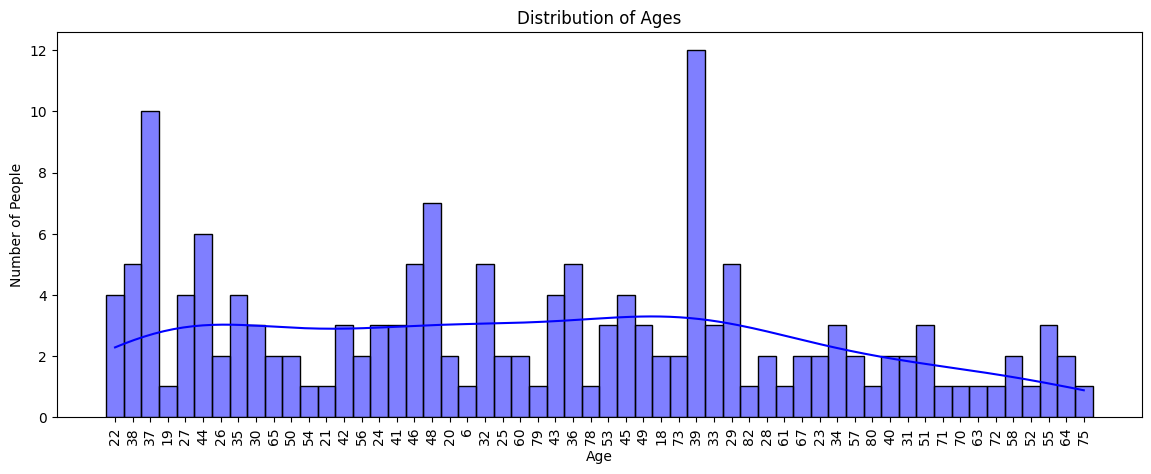

In [271]:
#Plot 2: Distribution of ages
Age = df['Age'].astype(str)

plt.figure(figsize=(14, 5))
sns.histplot(Age, color='blue', bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Distribution of Ages')
plt.xticks(rotation=90)
plt.show()

C:\Users\sifre\AppData\Local\Temp\ipykernel_19704\2873453830.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Country', data=df, order = df['Country'].value_counts().index, palette='viridis')


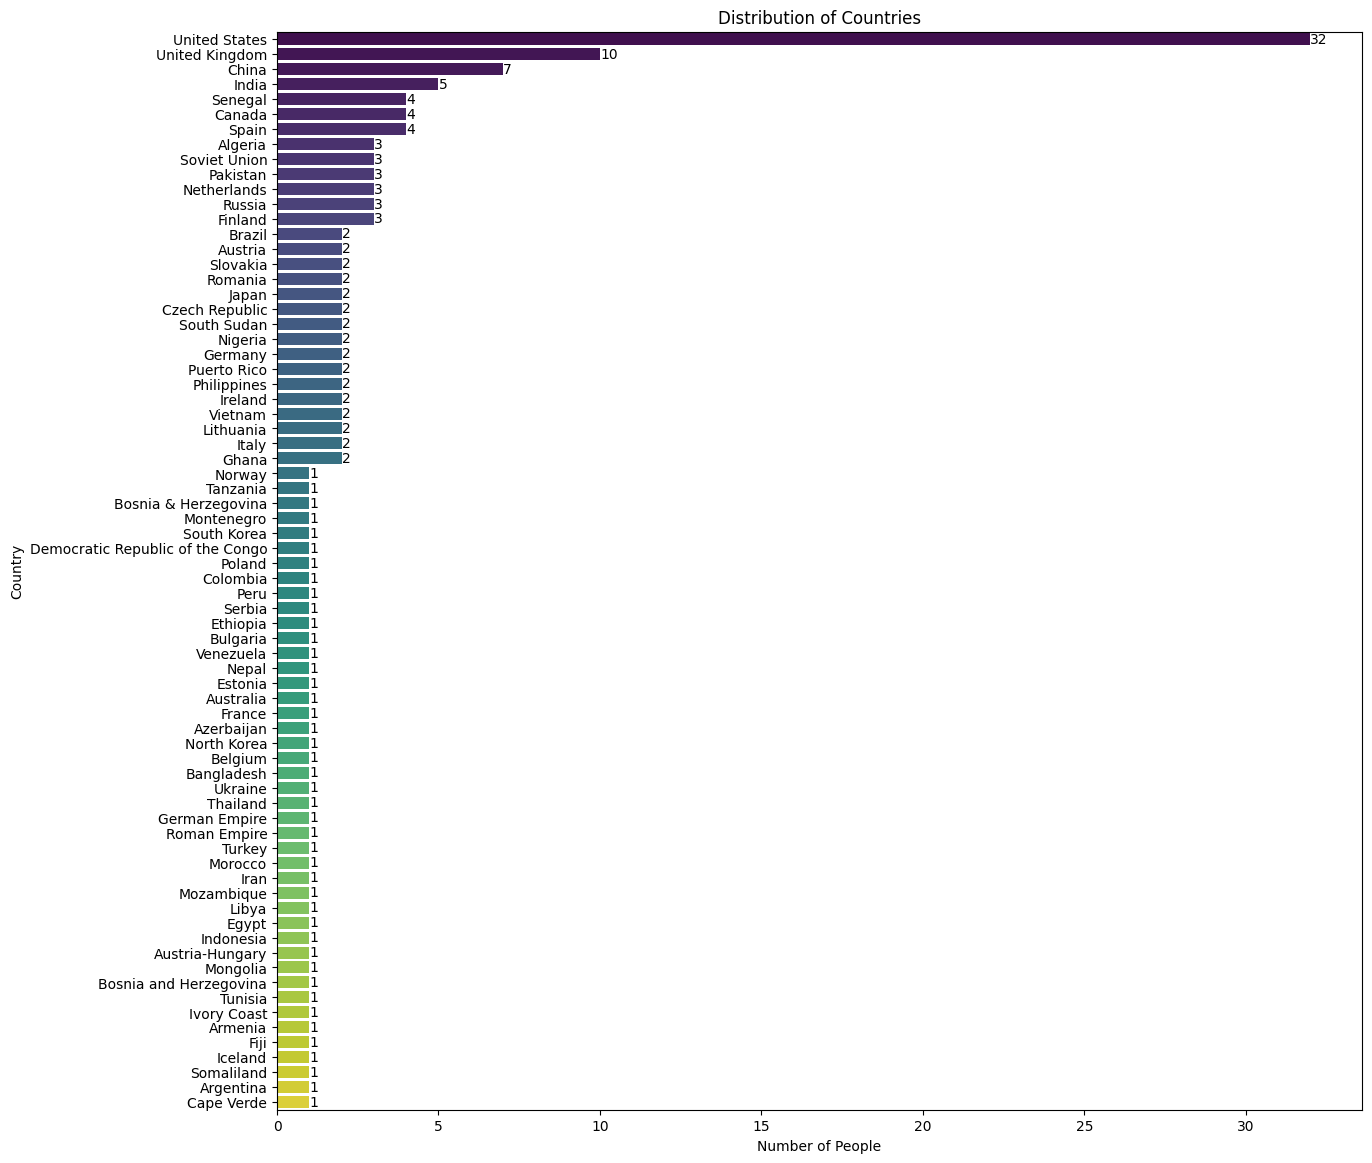

In [272]:
#Plot 3: Distribution of countries
plt.figure(figsize=(14, 14))
sns.countplot(y='Country', data=df, order = df['Country'].value_counts().index, palette='viridis')

#show each column value
for i, value in enumerate(df['Country'].value_counts()):
    plt.text(value, i, str(value), va='center')

plt.xlabel('Number of People')
plt.ylabel('Country')
plt.title('Distribution of Countries')
plt.show()


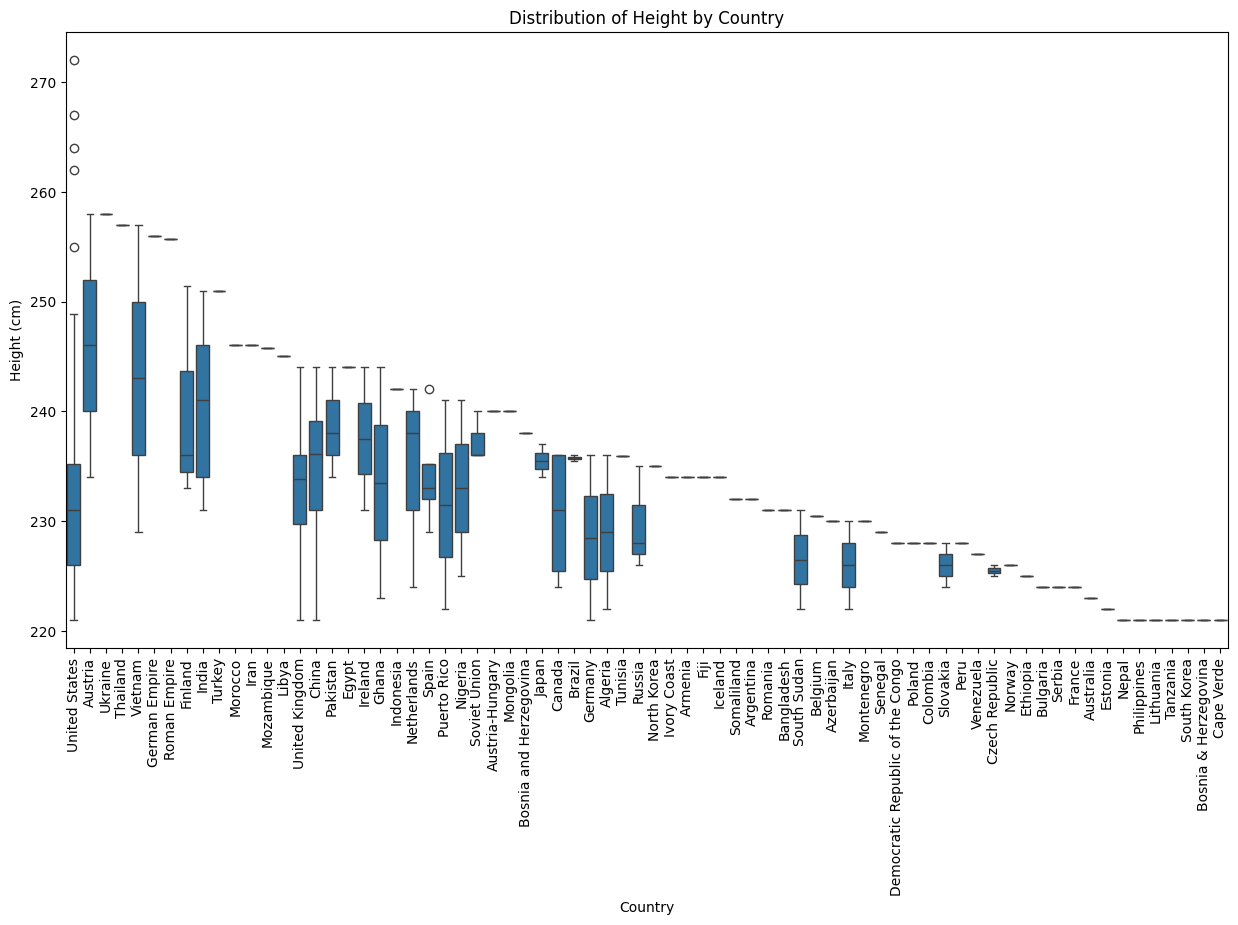

In [273]:
#Plot 4: Distribution of height by country 
plt.figure(figsize=(15, 8))
sns.boxplot(x='Country', y='Metric', data=df)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Height (cm)')
plt.title('Distribution of Height by Country')
plt.show()

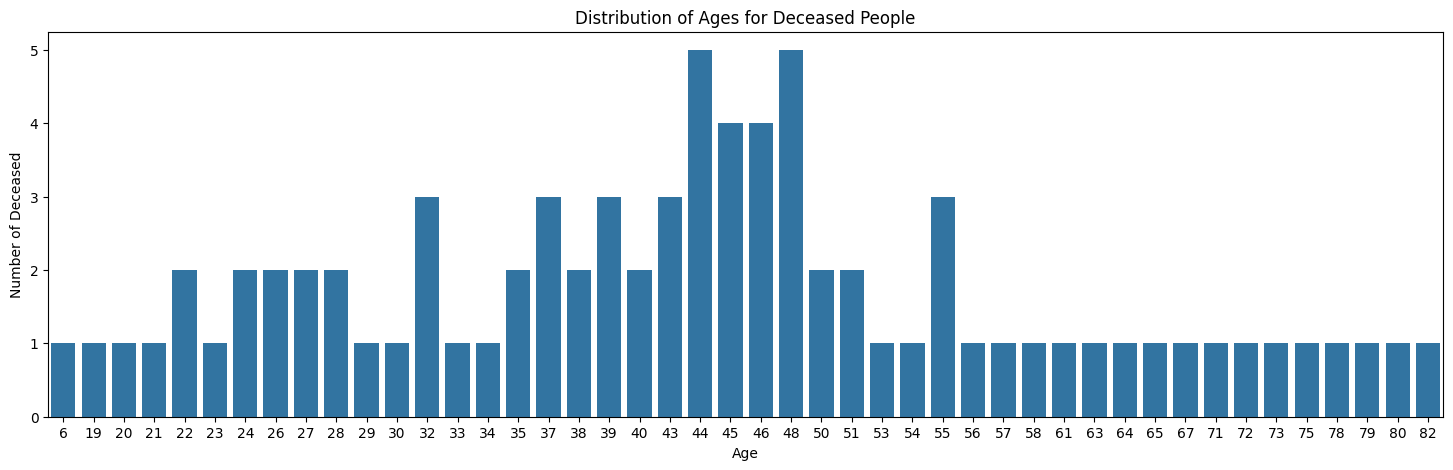

In [274]:
#Plot 5: Distribution of ages for deceased people
plt.figure(figsize=(18, 5))
sns.countplot(x='Age', data=df[df['IsDeath'] == 1])
plt.xlabel('Age')
plt.ylabel('Number of Deceased')
plt.title('Distribution of Ages for Deceased People')
plt.show()



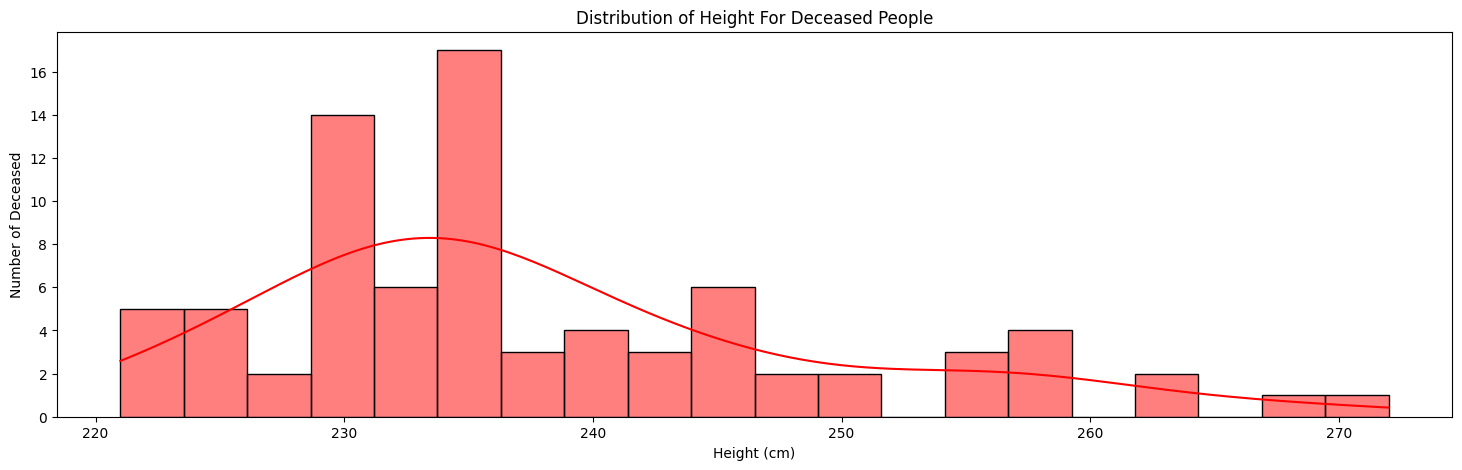

In [275]:
#Plot 6: Distribution of height for deceased people
plt.figure(figsize=(18, 5))
sns.histplot(df[df['IsDeath'] == 1]['Metric'], color='red', bins=20, kde=True)
plt.xlabel('Height (cm)')
plt.ylabel('Number of Deceased')
plt.title('Distribution of Height For Deceased People')
plt.show()


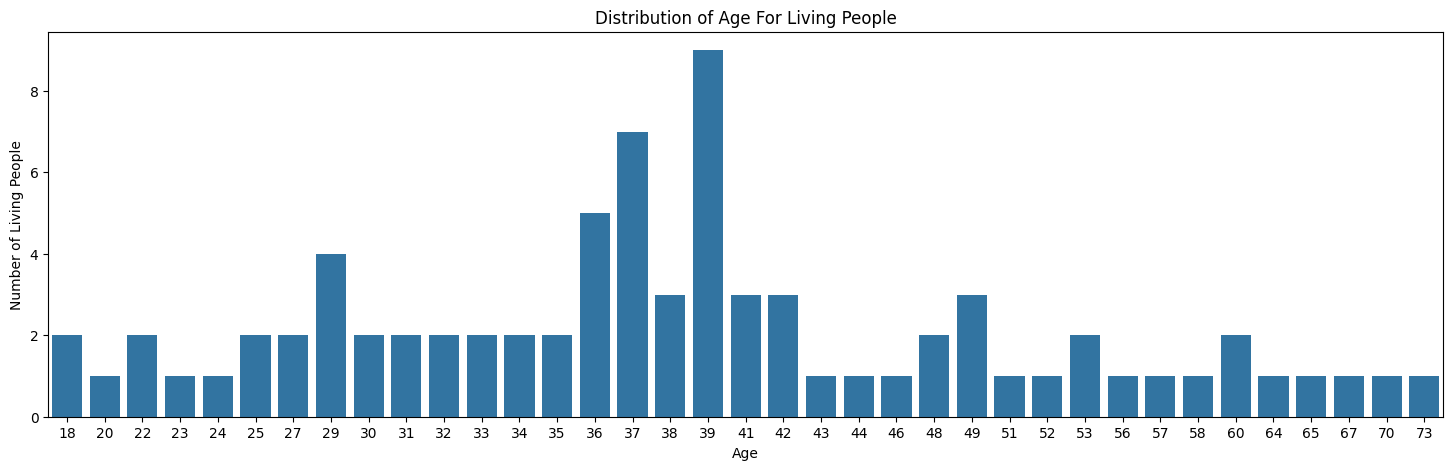

In [276]:
#Plot 7: Distribution of age for living people
plt.figure(figsize=(18, 5))
sns.countplot(x='Age', data=df[df['IsDeath'] == 0])
plt.xlabel('Age')
plt.ylabel('Number of Living People')
plt.title('Distribution of Age For Living People')
plt.show()